In [1]:
import pandas as pd
import numpy as np 

In [15]:
players = pd.read_csv("players_22.csv")

/var/folders/bg/s92k1gb90vq8f82_y8j2m2380000gn/T/ipykernel_34942/2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [16]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [17]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [18]:
players = players.dropna(subset=features)

In [19]:
data = players[features].copy()

In [20]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [21]:
data = ((data-data.min())/(data.max()-data.min()))*9+1

In [22]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  float64
 1   potential  19165 non-null  float64
 2   wage_eur   19165 non-null  float64
 3   value_eur  19165 non-null  float64
 4   age        19165 non-null  float64
dtypes: float64(5)
memory usage: 898.4 KB


In [28]:
data.head()


,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [33]:
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [66]:
centroids = random_centroids(data,5)

/var/folders/bg/s92k1gb90vq8f82_y8j2m2380000gn/T/ipykernel_34942/2296222301.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float(x.sample()))


In [67]:
centroids

,0,1,2,3,4
overall,4.521739,4.521739,6.086957,3.543478,6.086957
potential,4.913043,7.065217,3.739130,4.717391,5.108696
wage_eur,1.090129,1.038627,1.708155,2.068670,1.000000
value_eur,1.013501,1.026259,2.066642,1.039017,1.026259
age,2.333333,5.000000,6.333333,2.666667,3.333333


In [68]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [69]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [70]:
labels.value_counts()

0    7173
2    6223
1    5769
Name: count, dtype: int64

In [71]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [73]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

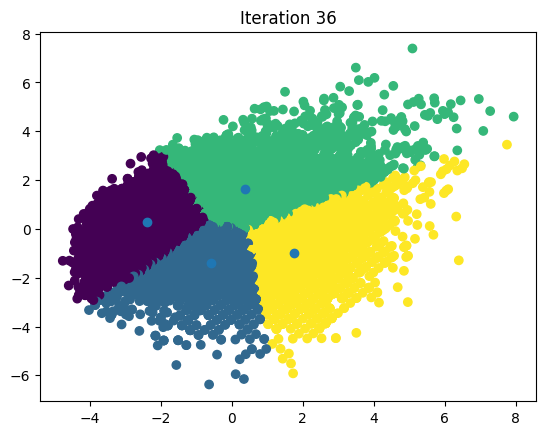

In [76]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [77]:
centroids

,0,1,2,3
overall,3.081840,3.922972,5.599178,5.452908
potential,5.098023,4.016388,6.494318,5.087637
wage_eur,1.025676,1.042872,1.360971,1.235738
value_eur,1.025136,1.026810,1.265484,1.093289
age,2.285782,4.387198,3.319365,5.922114


In [79]:
players[labels==0][['short_name']+features]

,short_name,overall,potential,wage_eur,value_eur,age
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
8165,Elton Coengo,67,67,6000.0,1200000.0,21
...,...,...,...,...,...,...
19233,R. Gallagher,47,61,500.0,110000.0,20
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [85]:

cluster_groups = data.copy()
cluster_groups['cluster'] = labels


cluster_summary = cluster_groups.groupby('cluster').mean()
print(cluster_summary)


          overall  potential  wage_eur  value_eur       age
cluster                                                    
0        3.194834   5.177492  1.026370   1.025238  2.350493
1        4.000353   4.093578  1.043830   1.026915  4.453665
2        5.681601   6.545900  1.469644   1.335504  3.428841
3        5.512818   5.152677  1.277013   1.101737  5.992154


In [86]:

players['cluster'] = labels


def top_players_in_cluster(cluster_label, top_n=5):
    cluster_players = players[players['cluster'] == cluster_label]
    top_players = cluster_players[['short_name', 'overall', 'value_eur', 'age']].sort_values(by='overall', ascending=False).head(top_n)
    return top_players


for cluster in range(centroid_count):
    print(f"Cluster {cluster} - Top Players:")
    print(top_players_in_cluster(cluster))
    print("\n")


Cluster 0 - Top Players:
           short_name  overall  value_eur  age
8028     Narcisso Mau       67  1100000.0   21
8030  Edenildo Lagoas       67  1100000.0   21
8040      Dener Rolim       67  1200000.0   21
8165     Elton Coengo       67  1200000.0   21
8166  Freddy Cardouso       67  1200000.0   21


Cluster 1 - Top Players:
            short_name  overall  value_eur  age
5957  Luciano Cacheira       69  1100000.0   25
5960     Nosberto Vila       69  1400000.0   25
5967    Emidio Hoffman       69  1300000.0   25
5968   Césario Limberg       69  1300000.0   25
5971   Hedson Porfírio       69  1500000.0   25


Cluster 2 - Top Players:
       short_name  overall    value_eur  age
0        L. Messi       93   78000000.0   34
1  R. Lewandowski       92  119500000.0   32
3       Neymar Jr       91  129000000.0   29
4    K. De Bruyne       91  125500000.0   30
5        J. Oblak       91  112000000.0   28


Cluster 3 - Top Players:
           short_name  overall   value_eur  age
2   Cr